In [31]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import pandas as pd 
import datetime as dt
from matplotlib import pyplot as plt

In [3]:
# Load in the data
dataset = pd.read_csv('coin_Bitcoin.csv', index_col='Name', parse_dates=True)

In [4]:
dataset.head()

,SNo,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
Name,,,,,,,,,
Bitcoin,1,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
Bitcoin,2,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
Bitcoin,3,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
Bitcoin,4,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
Bitcoin,5,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [5]:
dataset.isna().any()

SNo          False
Symbol       False
Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Marketcap    False
dtype: bool

In [6]:
# Getting some information on the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2862 entries, Bitcoin to Bitcoin
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2862 non-null   int64  
 1   Symbol     2862 non-null   object 
 2   Date       2862 non-null   object 
 3   High       2862 non-null   float64
 4   Low        2862 non-null   float64
 5   Open       2862 non-null   float64
 6   Close      2862 non-null   float64
 7   Volume     2862 non-null   float64
 8   Marketcap  2862 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 223.6+ KB


<AxesSubplot:>

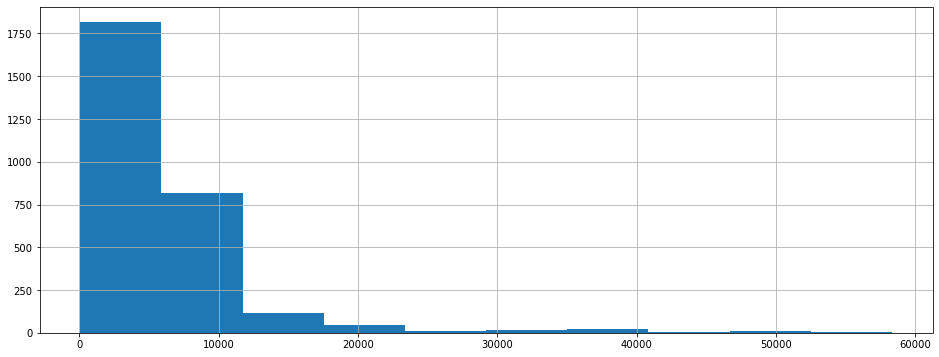

In [10]:
# Plotting some of the data
dataset['High'].hist(figsize=(16,6))

In [11]:
# Blurring out the first seven lines of the dataset for predictions
dataset.rolling(7).mean().head(20)

,SNo,High,Low,Open,Close,Volume,Marketcap
Name,,,,,,,
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,4.0,128.833714,106.684986,121.582000,118.842856,0.0,1.319866e+09
Bitcoin,5.0,125.572999,102.776414,118.944286,114.237143,0.0,1.269188e+09
Bitcoin,6.0,120.789286,97.583556,114.408572,110.308572,0.0,1.226013e+09


In [12]:
training_set = dataset['Close']
training_set = pd.DataFrame(training_set)

In [13]:
print(training_set)

                Close
Name                 
Bitcoin    144.539993
Bitcoin    139.000000
Bitcoin    116.989998
Bitcoin    105.209999
Bitcoin     97.750000
...               ...
Bitcoin  48824.426869
Bitcoin  49705.333316
Bitcoin  47093.853019
Bitcoin  46339.760083
Bitcoin  46188.451275

[2862 rows x 1 columns]


In [45]:
# Doing the feature scaling in the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2861):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train)

[[[1.32429077e-03]
  [1.22789530e-03]
  [8.44922917e-04]
  ...
  [6.18027881e-04]
  [6.18897930e-04]
  [5.74301861e-04]]

 [[1.22789530e-03]
  [8.44922917e-04]
  [6.39951823e-04]
  ...
  [6.18897930e-04]
  [5.74301861e-04]
  [4.56194721e-04]]

 [[8.44922917e-04]
  [6.39951823e-04]
  [5.10148400e-04]
  ...
  [5.74301861e-04]
  [4.56194721e-04]
  [4.62194265e-04]]

 ...

 [[4.58811771e-01]
  [4.55945256e-01]
  [4.70082927e-01]
  ...
  [1.00000000e+00]
  [9.42012582e-01]
  [8.48350663e-01]]

 [[4.55945256e-01]
  [4.70082927e-01]
  [4.74913645e-01]
  ...
  [9.42012582e-01]
  [8.48350663e-01]
  [8.63678369e-01]]

 [[4.70082927e-01]
  [4.74913645e-01]
  [5.00639727e-01]
  ...
  [8.48350663e-01]
  [8.63678369e-01]
  [8.18238808e-01]]]


In [20]:
# Making the imports to make the neural network
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [21]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [23]:
# Compiling the model 
regressor.compile(optimizer='adam', loss='binary_crossentropy')

# Fitting the model 
history = regressor.fit(X_train, y_train, epochs = 10, batch_size = 40)

Epoch 1/10
71/71 [==============================] - 14s 118ms/step - loss: 0.5274
Epoch 2/10
71/71 [==============================] - 11s 149ms/step - loss: 0.4692
Epoch 3/10
71/71 [==============================] - 8s 108ms/step - loss: 0.4661
Epoch 4/10
71/71 [==============================] - 9s 126ms/step - loss: 0.4556
Epoch 5/10
71/71 [==============================] - 9s 120ms/step - loss: 0.4434
Epoch 6/10
71/71 [==============================] - 8s 116ms/step - loss: 0.4423
Epoch 7/10
71/71 [==============================] - 7s 101ms/step - loss: 0.4693
Epoch 8/10
71/71 [==============================] - 12s 168ms/step - loss: 0.4535
Epoch 9/10
71/71 [==============================] - 13s 188ms/step - loss: 0.4653
Epoch 10/10
71/71 [==============================] - 10s 147ms/step - loss: 0.4461


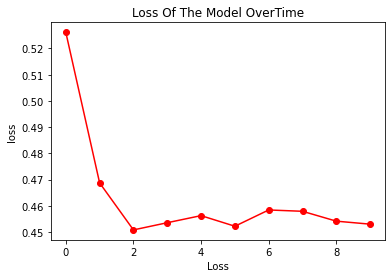

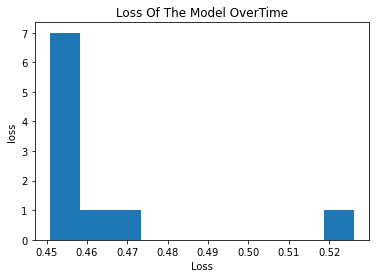

In [24]:
# Plotting the loss of the model overtime
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string], 'ro-')
    plt.title("Loss Of The Model OverTime")
    plt.xlabel("Loss")
    plt.ylabel(string)
    plt.show()
    
def plot_histogram(history, string):
    plt.hist(history.history[string])
    plt.title("Loss Of The Model OverTime")
    plt.xlabel("Loss")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'loss')
plot_histogram(history, 'loss')

In [27]:
!pip3 install pandas_datareader

     |████████████████████████████████| 107 kB 71 kB/s eta 0:00:011


In [28]:
import pandas_datareader as web

In [29]:
crypto_currency = 'BTC' 
against_currency = 'USD'

In [32]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

In [36]:
test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)

In [37]:
print(test_data)

                    High           Low          Open         Close  \
Date                                                                 
2019-12-31   7335.290039   7169.777832   7294.438965   7193.599121   
2020-01-01   7254.330566   7174.944336   7194.892090   7200.174316   
2020-01-02   7212.155273   6935.270020   7202.551270   6985.470215   
2020-01-03   7413.715332   6914.996094   6984.428711   7344.884277   
2020-01-04   7427.385742   7309.514160   7345.375488   7410.656738   
...                  ...           ...           ...           ...   
2021-06-02  39478.953125  37243.972656  37599.410156  39208.765625   
2021-06-03  39242.484375  35717.722656  39242.484375  36894.406250   
2021-06-04  37917.714844  34900.414062  36880.156250  35551.957031   
2021-06-05  36436.421875  35304.578125  35538.609375  35862.378906   
2021-06-07  36790.570312  35660.035156  35833.187500  35955.726562   

                  Volume     Adj Close  
Date                                    
2019-12

In [38]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0) 

In [62]:
actual_prices = test_data['Close'].values

In [77]:
prediction_days = 60

In [42]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

In [47]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [51]:
model_inputs = model_inputs.reshape(-1, 1)

In [52]:
model_inputs = scaler.fit_transform(model_inputs)

In [ ]:
print(model_inputs)

In [54]:
x_test = []

In [55]:
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [57]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [58]:
prediction_prices = regressor.predict(x_test)

prediction_prices = scaler.inverse_transform(prediction_prices)

In [59]:
print(prediction_prices)

[[32227.295 35991.707 33736.668 ... 34094.74  36683.336 35613.715]
 [32062.082 35814.754 33606.508 ... 33744.09  36468.746 35341.145]
 [31422.686 35393.86  33171.29  ... 32767.512 36006.42  34747.062]
 ...
 [31605.984 36014.12  33494.668 ... 33648.05  36703.215 35652.047]
 [31849.861 36010.32  33573.582 ... 33865.97  36712.56  35654.465]
 [32065.574 36007.285 33662.168 ... 34021.652 36708.625 35646.426]]


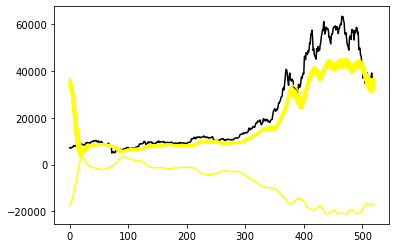

In [66]:
plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='yellow', label='Prediction Prices')
plt.show()

# Prediction of the next day

In [67]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]]

In [73]:
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

print(real_data[0])

[[0.93661279]
 [0.94364699]
 [0.93832497]
 [1.        ]
 [0.99327279]
 [0.99676343]
 [0.96701555]
 [0.95182798]
 [0.87550075]
 [0.86709659]
 [0.87988886]
 [0.83603401]
 [0.79940803]
 [0.78798498]
 [0.77016955]
 [0.75228871]
 [0.83801007]
 [0.85528868]
 [0.85172803]
 [0.83003769]
 [0.9017082 ]
 [0.90303866]
 [0.882589  ]
 [0.89231374]
 [0.82625228]
 [0.89613579]
 [0.87858163]
 [0.89498079]
 [0.91970843]
 [0.90994532]
 [0.86941207]
 [0.88384465]
 [0.75478785]
 [0.76445179]
 [0.76725951]
 [0.71395001]
 [0.70875412]
 [0.65889228]
 [0.64816136]
 [0.54724402]
 [0.61182842]
 [0.55240781]
 [0.5563704 ]
 [0.50911388]
 [0.5763481 ]
 [0.57115855]
 [0.58639751]
 [0.57175217]
 [0.52495159]
 [0.50647406]
 [0.52461884]
 [0.55288898]
 [0.54181944]
 [0.55702896]
 [0.58493792]
 [0.5453983 ]
 [0.52246326]
 [0.52776665]
 [0.52936145]]


In [92]:
prediction = regressor.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction[0][0]}")
print("\n\n\n\n")
print(prediction)

Prediction: 32205.96875





[[ 32205.969  35963.297  33703.53   33605.91   35181.605  34790.57
   34228.66   33006.066  35393.6    34825.777  34808.95   35383.52
   35070.992  33667.895  34516.984  35287.1    34944.406  33313.68
   31815.305  33764.977  32795.285  34632.457  32692.8    33423.137
   32874.39   33755.113  34649.824  34531.55   35027.066  33925.797
   32964.027  34651.684 -17438.592  35306.668  34754.79   33166.65
   33733.098  34237.426  33987.566  33880.19   36278.72   34224.78
   33330.375  33886.684  36571.434  34036.55   33863.188  34081.76
   36662.83   35581.17 ]]
